<a href="https://colab.research.google.com/github/tengfeixia/RN_avec_des_incertitudes_propag-es/blob/main/DNN_Version_3_1_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)  # for reproducibility
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
import tensorflow as tf

In [ ]:
X=torch.unsqueeze(torch.linspace(-3,3,1000), dim =1)
Y=X.pow(2)+1

sigmaY = 0.1*Y+0.1*Y*torch.randn(X.size()) +0.1
Y+=sigmaY

X1= X
Y1 =Y

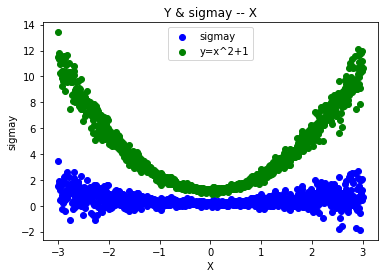

In [ ]:
plt.figure()
plt.title("Y & sigmay -- X")
plt.xlabel ("X")
plt.ylabel ("sigmay")
plt.scatter(X.data.numpy(),sigmaY.data.numpy(), color ='b', label='sigmay')
plt.scatter(X.data.numpy(),Y.data.numpy(),color='g',label = 'y=x^2+1')
plt.legend()

In [ ]:
my_callbacks = [keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode="min")]
model = keras.Sequential ([
                           Dense (32, input_shape = ((1,))), Activation('tanh'),
                           Dense (64), Activation('tanh'),
                           Dense (32), Activation('tanh'),
                           Dense (1), Activation('tanh')
])
my_opti = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0, nesterov=False, name='SGD')

model.compile (optimizer = my_opti, loss= 'mse' )
model.fit (X.data.numpy(), sigmaY.data.numpy(), batch_size=10,epochs=1000, callbacks= my_callbacks)






Epoch 1/1000
100/100 [==============================] - 11s 1ms/step - loss: 0.3846
Epoch 2/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2863
Epoch 3/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2682
Epoch 4/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.3335
Epoch 5/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.3008
Epoch 6/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2935
Epoch 7/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2848
Epoch 8/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2800
Epoch 9/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2571
Epoch 10/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2390
Epoch 11/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2664
Epoch 12/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2332


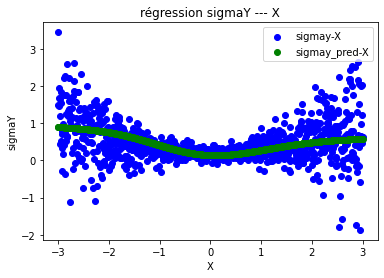

In [ ]:
sigmaY1 = torch.from_numpy(model.predict (X.data.numpy()))


plt.figure()
plt.xlabel ("X")
plt.ylabel ("sigmaY")
plt.title ("régression sigmaY --- X")
plt.scatter(X.data.numpy(),sigmaY.data.numpy(), color = 'b', label='sigmay-X')
plt.scatter(X.data.numpy(),sigmaY1, color='g', label='sigmay_pred-X')
plt.legend()


Net(
  (hidden1): Linear(in_features=1, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (predict): Linear(in_features=64, out_features=1, bias=True)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


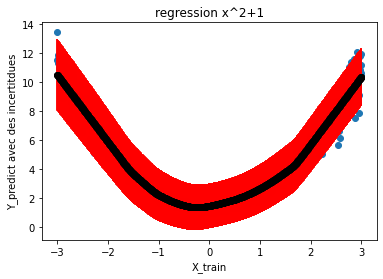

'\nmy_X = X.data.numpy()\nmy_pred = prediction.data.numpy()\n\nplt.figure()\nplt.xlabel ("X_train")\nplt.ylabel ("Y_target avec ses incertitdues")\nplt.title ("données orginaux")\nplt.errorbar(X.data.numpy(),Y.data.numpy(),yerr = sigmaY.data.numpy(),fmt=\'o\', ecolor=\'red\', color = \'b\')\nplt.show()\n\nplt.figure()\n\nplt.title("MSE -- nb d\'itération\nRN avec des incertidues")\nplt.xlabel ("nb d\'itération")\nplt.ylabel ("MSE")\nplt.plot(classical_loss, \'b\', label=\'MSE classique\')\nplt.plot(my_loss, \'g\', label=\'MSE relative\')\nplt.legend()\n'

In [ ]:

class Net (torch.nn.Module):
    def __init__(self,n_feature,n_hidden1,n_hidden2,n_output):
        super(Net,self).__init__()
        self.hidden1=torch.nn.Linear(n_feature,n_hidden1)
        self.hidden2 = torch.nn.Linear(n_hidden1,n_hidden2)
        self.predict=torch.nn.Linear(n_hidden2,n_output)
    
    def forward(self,x):
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=self.predict(x)
        return x

net = Net(n_feature=1, n_hidden1=128,n_hidden2 = 64,n_output=1)
print (net)
optimizer = torch.optim.Adam (net.parameters(),lr=0.001)
loss_func1 = torch.nn.MSELoss()
classical_loss = []
my_loss = []

for t in range (2000):
    prediction = net(X)
    
    prediction_sigmaY1 = net(sigmaY1)
    
    loss = loss_func1(prediction/prediction_sigmaY1,Y/prediction_sigmaY1)
    classical_loss.append(loss_func1(prediction,Y))
    my_loss.append (loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
plt.figure()
plt.xlabel ("X_train")
plt.ylabel ("Y_predict avec des incertitdues")
plt.title ("regression x^2+1")
plt.errorbar(X.data.numpy(),prediction.data.numpy(),yerr = prediction_sigmaY1.data.numpy(), fmt = 'o',ecolor = 'red', color='black')
plt.scatter(X.data.numpy(),Y.data.numpy())
plt.show()
"""


plt.figure()

plt.title("MSE -- nb d'itération\nRN avec des incertidues")
plt.xlabel ("nb d'itération")
plt.ylabel ("MSE")
plt.plot(classical_loss, 'b', label='MSE classique')
plt.plot(my_loss, 'g', label='MSE relative')
plt.legend()
"""

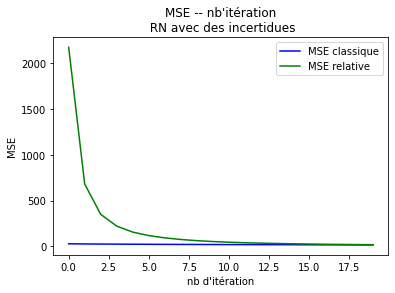

In [ ]:
plt.figure()
plt.title("MSE -- nb'itération\n RN avec des incertidues")
plt.xlabel ("nb d'itération")
plt.ylabel ("MSE")
plt.plot(classical_loss[0:20], 'b', label='MSE classique')
plt.plot(my_loss[0:20], 'g', label='MSE relative')
plt.legend()

In [ ]:
X1=torch.unsqueeze(torch.linspace(2,4,400), dim =1)
Y1=X1.pow(2)+1
Y1 += 0.3*Y1*torch.rand(X1.size())
sigmaY1 = Y1 - X1.pow(2)
#print (sigmaY)

Net(
  (hidden1): Linear(in_features=1, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (predict): Linear(in_features=32, out_features=1, bias=True)
)


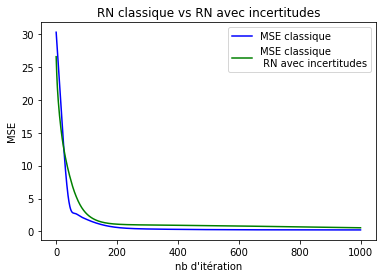

In [ ]:

class Net (torch.nn.Module):
    def __init__(self,n_feature,n_hidden1,n_hidden2,n_output):
        super(Net,self).__init__()
        self.hidden1=torch.nn.Linear(n_feature,n_hidden1)
        self.hidden2 = torch.nn.Linear(n_hidden1,n_hidden2)
        self.predict=torch.nn.Linear(n_hidden2,n_output)
    
    def forward(self,x):
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=self.predict(x)
        return x

net = Net(n_feature=1, n_hidden1=64,n_hidden2 = 32,n_output=1)
print (net)

optimizer = torch.optim.Adam (net.parameters(),lr=0.001)
loss_func = torch.nn.MSELoss()
classical_loss1 = []
for t in range (1000):
    prediction1 = net(X)
    
    loss = loss_func(prediction1,Y)
    classical_loss1.append(loss_func(prediction1,Y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    


plt.figure()
plt.xlabel ("nb d'itération")
plt.ylabel ("MSE")
plt.title ("RN classique vs RN avec incertitudes")
plt.plot(classical_loss1[0:1000], 'b', label='MSE classique')
plt.plot(classical_loss[0:1000], 'g', label='MSE classique\n RN avec incertitudes')
plt.legend()

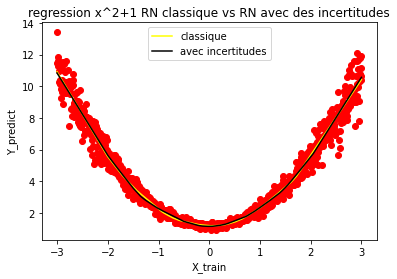

In [ ]:
my_X = X.data.numpy()
my_pred = prediction.data.numpy()
plt.figure()
plt.xlabel ("X_train")
plt.ylabel ("Y_predict")
plt.title ("regression x^2+1 RN classique vs RN avec des incertitudes")
plt.plot(X.data.numpy(),prediction1.data.numpy(),color='yellow', label = 'classique')
plt.plot(my_X,my_pred,color='black',label = 'avec incertitudes')
plt.legend()
plt.scatter(X.data.numpy(),Y.data.numpy(),color = 'r')
plt.show()
